# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.420  1  0.879 0.350 0.005   
                             age        0.030  1  0.062 0.804 0.000   
                             Kiel       1.561  1  3.268 0.072 0.017   
                             Magdeburg  4.261  1  8.923 0.003 0.045   
                             Sweden     7.382  1 15.458 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.209  1  0.239 0.626 0.001   
                             age        3.778  1  4.315 0.039 0.022   
                             Kiel       0.273  1  0.312 0.577 0.002   
                             Magdeburg  2.137  1  2.441 0.120 0.013   
                             Sweden    16.884  1 19.286 0.000 0.092   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.456  0.513    False  
                             age               0.095  0.884    False  
                             Kiel              1.141  0.162    False  
                             Magdeburg         2.497  0.013     True  
                             Sweden            3.928  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.204  0.752    False  
                             age               1.408  0.101    False  
                             Kiel              0.239  0.713    False  
                             Magdeburg         0.921  0.241    False  
                             Sweden            4.730  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.981  1  7.376 0.007 0.037   
                             age        0.003  1  0.025 0.876 0.000   
                             Kiel       0.215  1  1.620 0.205 0.008   
                             Magdeburg  0.402  1  3.025 0.084 0.016   
                             Sweden     1.533  1 11.522 0.001 0.057   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.881  1  1.913 0.168 0.010   
                             age        1.324  1  2.875 0.092 0.015   
                             Kiel       1.965  1  4.268 0.040 0.022   
                             Magdeburg  1.326  1  2.880 0.091 0.015   
                             Sweden    10.943  1 23.772 0.000 0.111   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.142  0.021     True  
                             age               0.058  0.923    False  
                             Kiel              0.689  0.328    False  
                             Magdeburg         1.078  0.162    False  
                             Sweden            3.078  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.774  0.282    False  
                             age               1.038  0.175    False  
                             Kiel              1.396  0.089    False  
                             Magdeburg         1.040  0.174    False  
                             Sweden            5.643  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.350         0.456  0.513    False   
                             age       0.804         0.095  0.884    False   
                             Kiel      0.072         1.141  0.162    False   
                             Magdeburg 0.003         2.497  0.013     True   
                             Sweden    0.000         3.928  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.626         0.204  0.752    False   
                             age       0.039         1.408  0.101    False   
                             Kiel      0.577         0.239  0.713    False   
                             Magdeburg 0.120         0.921  0.241    False   
                             Sweden    0.000         4.730  0.000     True   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.142  0.021     True  
                             age       0.876         0.058  0.923    False  
                             Kiel      0.205         0.689  0.328    False  
                             Magdeburg 0.084         1.078  0.162    False  
                             Sweden    0.001         3.078  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.168         0.774  0.282    False  
                             age       0.092         1.038  0.175    False  
                             Kiel      0.040         1.396  0.089    False  
                             Magdeburg 0.091         1.040  0.174    False  
                             Sweden    0.000         5.643  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.477     0.338     0.233         3.101     0.291
std       0.303         5.303     0.331     0.297         5.840     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.331     0.016     0.001         0.388     0.003
50%       0.122         0.912     0.245     0.071         1.147     0.142
75%       0.467         2.410     0.623     0.409         3.130     0.546
max       0.999       143.434     0.999     0.999        84.817     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.350         0.456   
A0A024R0T9;K7ER74;P02655                           AD     0.037         1.426   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.106         0.976   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.533         0.274   
A0A075B6H7                                         AD     0.153         0.816   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.023         1.637   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.207         0.685   
S4R3U6                                             AD     0.626         0.204   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.513    False   
A0A024R0T9;K7ER74;P02655                           AD      0.097    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.219    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.678    False   
A0A075B6H7                                         AD      0.286    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.066    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.356    False   
S4R3U6                                             AD      0.752    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.142   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.464   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.401         0.397   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.254         0.595   
A0A075B6H7                                         AD     0.006         2.205   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.215         0.668   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.437         0.360   
S4R3U6                                             AD     0.168         0.774   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.021     True  
A0A024R0T9;K7ER74;P02655                           AD      0.079    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.537    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.387    False  
A0A075B6H7                                         AD      0.019     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.404     0.338     0.248         1.516     0.313
std       0.292         1.646     0.317     0.295         1.763     0.318
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.012         0.357     0.040     0.009         0.369     0.026
50%       0.131         0.883     0.257     0.101         0.996     0.189
75%       0.439         1.906     0.599     0.428         2.043     0.564
max       0.997        23.309     0.998     0.999        19.100     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1035,974


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.350         0.456  0.513   
A0A024R0T9;K7ER74;P02655                           0.037         1.426  0.097   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.106         0.976  0.219   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.533         0.274  0.678   
A0A075B6H7                                         0.153         0.816  0.286   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.023         1.637  0.066   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.207         0.685  0.356   
S4R3U6                                             0.626         0.204  0.752   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.007   
A0A024R0T9;K7ER74;P02655                              False 0.034   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.401   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.254   
A0A075B6H7                                            False 0.006   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.215   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.437   
S4R3U6                                                False 0.168   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.142  0.021   
A0A024R0T9;K7ER74;P02655                                   1.464  0.079   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.397  0.537   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.595  0.387   
A0A075B6H7                                                 2.205  0.019   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.291   
Q9Y6X5                                                     0.668  0.340   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.162   
Q9Y6Y9                                                     0.360  0.572   
S4R3U6                                                     0.774  0.282   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    907
PI (yes) - RF (yes)   319
PI (no)  - RF (yes)   128
PI (yes) - RF (no)     67
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                  RF  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.350         0.456  0.513    False 0.007   
A0A075B6H7                   0.153         0.816  0.286    False 0.006   
A0A075B6I0                   0.034         1.473  0.090    False 0.001   
A0A075B6R2                   0.360         0.444  0.521    False 0.002   
A0A075B7B8                   0.495         0.305  0.647    False 0.000   
...                            ...           ...    ...      ...   ...   
Q9ULZ9                       0.001         2.841  0.007     True 0.041   
Q9UNW1                       0.010         2.000  0.034     True 0.988   
Q9UP79                       0.666         0.176  0.783    False 0.000   
Q9UQ52                       0.071         1.147  0.161    False 0.001   
Q9Y6C2                       0.359         0.445  0.521    False 0.005   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.142  0.021     True       186  
A0A075B6H7                           2.205  0.019     True        91  
A0A075B6I0                           3.078  0.003     True       194  
A0A075B6R2                           2.737  0.007     True       164  
A0A075B7B8                           4.690  0.000     True        57  
...                                    ...    ...      ...       ...  
Q9ULZ9                               1.392  0.090    False       171  
Q9UNW1                               0.005  0.992    False       171  
Q9UP79                               3.524  0.001     True       135  
Q9UQ52                               3.010  0.004     True       188  
Q9Y6C2                               2.274  0.016     True       119  

[195 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.513,0.021,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.097,0.079,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.219,0.537,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.678,0.387,196,PI (no) - RF (no)
A0A075B6H7,0.286,0.019,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.316,0.291,197,PI (no) - RF (no)
Q9Y6X5,0.066,0.340,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.162,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P52758,0.000,0.984,119,PI (yes) - RF (no),0.984
Q96PQ0,0.008,0.992,177,PI (yes) - RF (no),0.984
A0A087X152;D6RE16;E0CX15;O95185;O95185-2,0.010,0.992,176,PI (yes) - RF (no),0.982
P48745,0.997,0.018,180,PI (no) - RF (yes),0.979
F6VDH7;P50502;Q3KNR6,0.012,0.982,175,PI (yes) - RF (no),0.970
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.048,197,PI (no) - RF (yes),0.009
Q9NX62,0.055,0.047,197,PI (no) - RF (yes),0.009
P00740;P00740-2,0.053,0.044,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


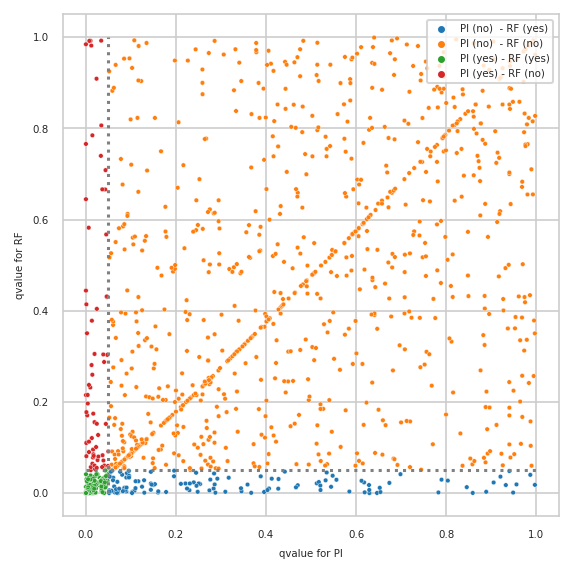

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


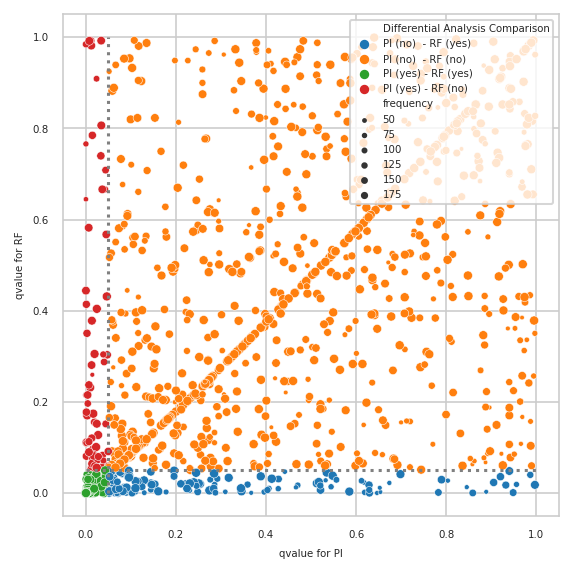

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out